# <center><font color = '#4b4bbf'>**MSDS610 Fall 2022 - EDA PRESENTATION**</font>

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

%config InlineBackend.figure_format='retina'

## 1 - Loading the dataset

First, we will need to load a dataset that we are interested in. We will then perform `EDA` on the dataset. The most popular package to assist in our EDA journey is `pandas` for data structuring and analysis, and `matplotlib` for visualizations. In this demonstration, we will use the popular `titanic` dataset.

In [2]:
# Import dataset for presentation
df = pd.read_csv('cars.csv')

## 2 - Explore and profile the dataset

Details of the dataset must be investigated. Like, how many records are there in the dataset, how many variables, null values, and so on.

We will find out how many records there are in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     392 non-null    float64
 1   CYL     392 non-null    int64  
 2   ENG     392 non-null    float64
 3   WGT     386 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.4 KB


There are 392 records and 4 variables in the dataset. There seems to some missing data in WGT. Let's confirm this next.

In [5]:
df.isnull().sum()

MPG    0
CYL    0
ENG    0
WGT    6
dtype: int64

Only one variable WGT has some missing values, 6 records to be exact. There are many ways of handling them. Since WGT is a continuous, we can fill the missing data with the median of the data in WGT.

In [6]:
# Fill missing value in WGT with median of WGT
df['WGT'] = df['WGT'].fillna(df['WGT'].median())

Let's check the data profile for missing data again.

In [7]:
df.isnull().sum()

MPG    0
CYL    0
ENG    0
WGT    0
dtype: int64

The missing data we saw earlier has been fixed.

## 3 - Identify distributions, trends and patterns

Until now, we really do not know more about the dataset, other than simply its dimensions and missing values in one of the variable. We should next explore what are the relationship that exist between the variables. What about the distributions of the variables? One effective approach is to represent them in visualizations to help us get a better picture of whats going on.

Let's say, we let the MPG variable be the dependent variable and the others like CYL, ENG and WGT be the independent variables. In other words, *does MPG change with given CYL, ENG and WGT parameters?*

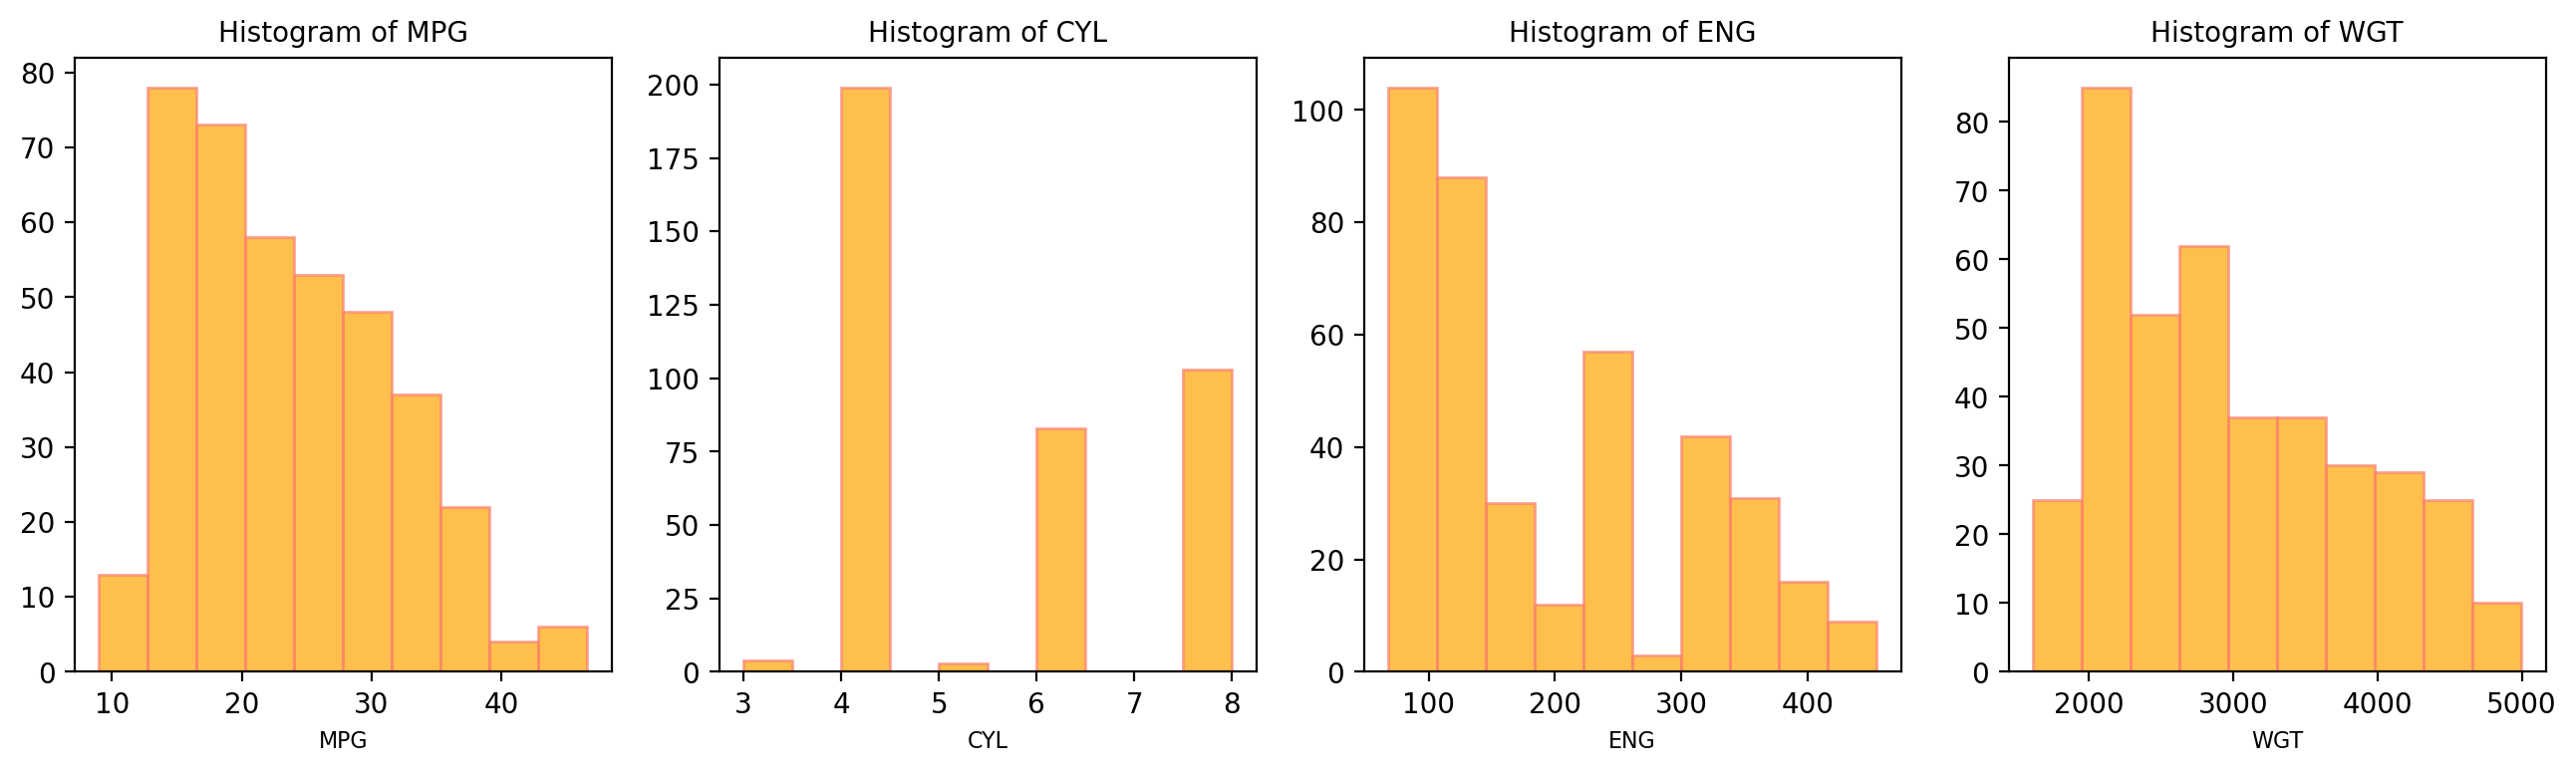

In [9]:
# Let's find out what the distributions of the variables are by plotting their data in histograms.
fig, ax = plt.subplots(1, 4, figsize = (16,4))

ax[0].hist(df['MPG'], color = 'orange', alpha = 0.7, edgecolor = 'salmon')
ax[0].set_title('Histogram of MPG', fontsize = 10)
ax[0].set_xlabel('MPG', fontsize = 8)

ax[1].hist(df['CYL'], color = 'orange', alpha = 0.7, edgecolor = 'salmon')
ax[1].set_title('Histogram of CYL', fontsize = 10)
ax[1].set_xlabel('CYL', fontsize = 8)

ax[2].hist(df['ENG'], color = 'orange', alpha = 0.7, edgecolor = 'salmon')
ax[2].set_title('Histogram of ENG', fontsize = 10)
ax[2].set_xlabel('ENG', fontsize = 8)

ax[3].hist(df['WGT'], color = 'orange', alpha = 0.7, edgecolor = 'salmon')
ax[3].set_title('Histogram of WGT', fontsize = 10)
ax[3].set_xlabel('WGT', fontsize = 8)

plt.show()

From the histograms, we note the following:
- MPG is weighted more between 15 to 20 MPG
- CLY of 4 is the most popular, CYL 3 and 5 could be showing data irregularity? <= We may need to make a decision to exclude these data if there is not many.
- ENG power is concentrated aroun 90 - 100
- WGT has concentration between 2000 - 3000

How does the independent variables CYL, ENG and WGT affect our dependent variable MPG? Lets plot the data in scatter plots to find out.

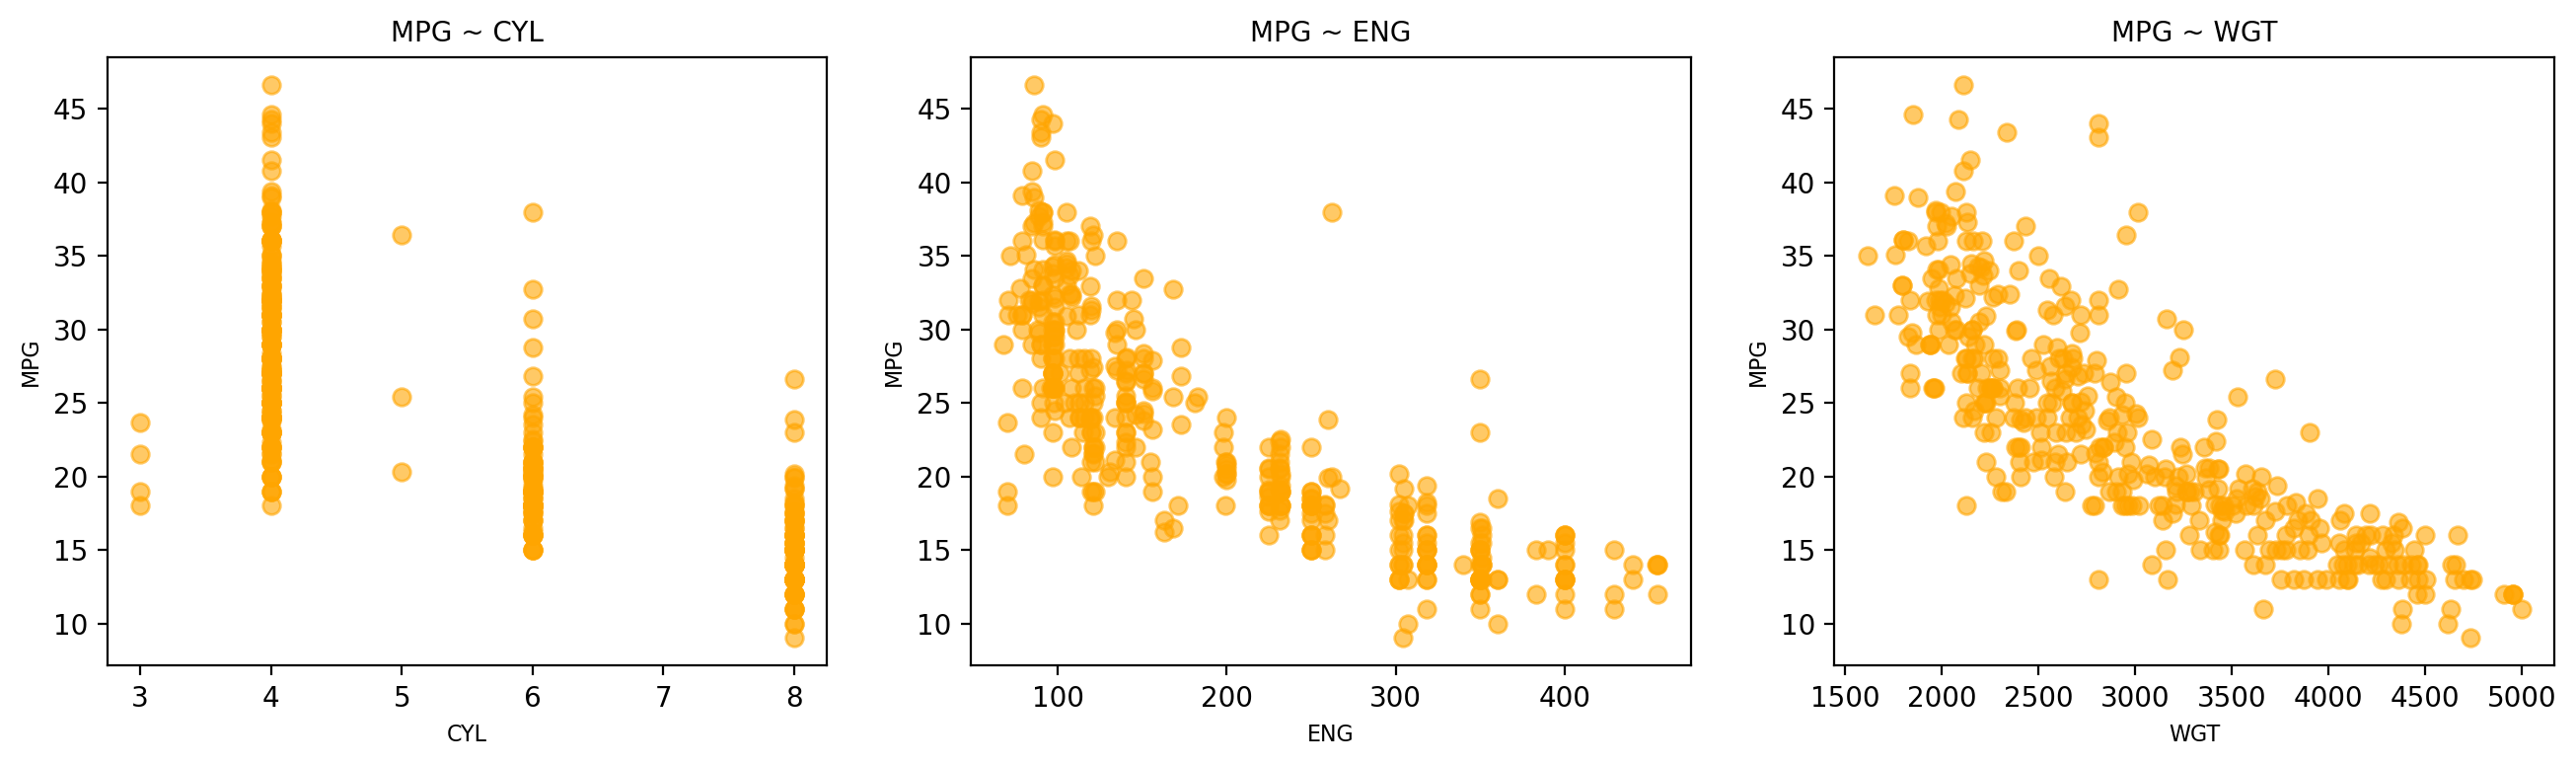

In [10]:
# Let's find out what the relationship of the dependent variable is to the independent variables.
fig, ax = plt.subplots(1, 3, figsize = (16,4))

ax[0].scatter(df['CYL'], df['MPG'], s = 40, alpha = 0.6, c = 'orange')
ax[0].set_title('MPG ~ CYL', fontsize = 10)
ax[0].set_xlabel('CYL', fontsize = 8)
ax[0].set_ylabel('MPG', fontsize = 8)

ax[1].scatter(df['ENG'], df['MPG'], s = 40, alpha = 0.6, c = 'orange')
ax[1].set_title('MPG ~ ENG', fontsize = 10)
ax[1].set_xlabel('ENG', fontsize = 8)
ax[1].set_ylabel('MPG', fontsize = 8)

ax[2].scatter(df['WGT'], df['MPG'], s = 40, alpha = 0.6, c = 'orange')
ax[2].set_title('MPG ~ WGT', fontsize = 10)
ax[2].set_xlabel('WGT', fontsize = 8)
ax[2].set_ylabel('MPG', fontsize = 8)

plt.show()

Now we have more insights into our dataset.
- There is an inverse relationship between MPG and CYL (*CYL is actually categorical and not continuous*)
- There is an inverse relationship between MPG and ENG
- There is an inverse relationship between MPG and WGT

These indeed confirm our intuition about cars and how the specifications of a car affects its MPG. Lighter cars with smaller engine tend to be more economical.

We can also use more interesting visualizations like a boxplot on CYL.

In [11]:
# Segment the dataset into respective CYL categories. We will exclude CYL 3 and 5 due to their small population size in this demonstration.
cyl4 = df[df['CYL'] == 4]['MPG']
cyl6 = df[df['CYL'] == 6]['MPG']
cyl8 = df[df['CYL'] == 8]['MPG']

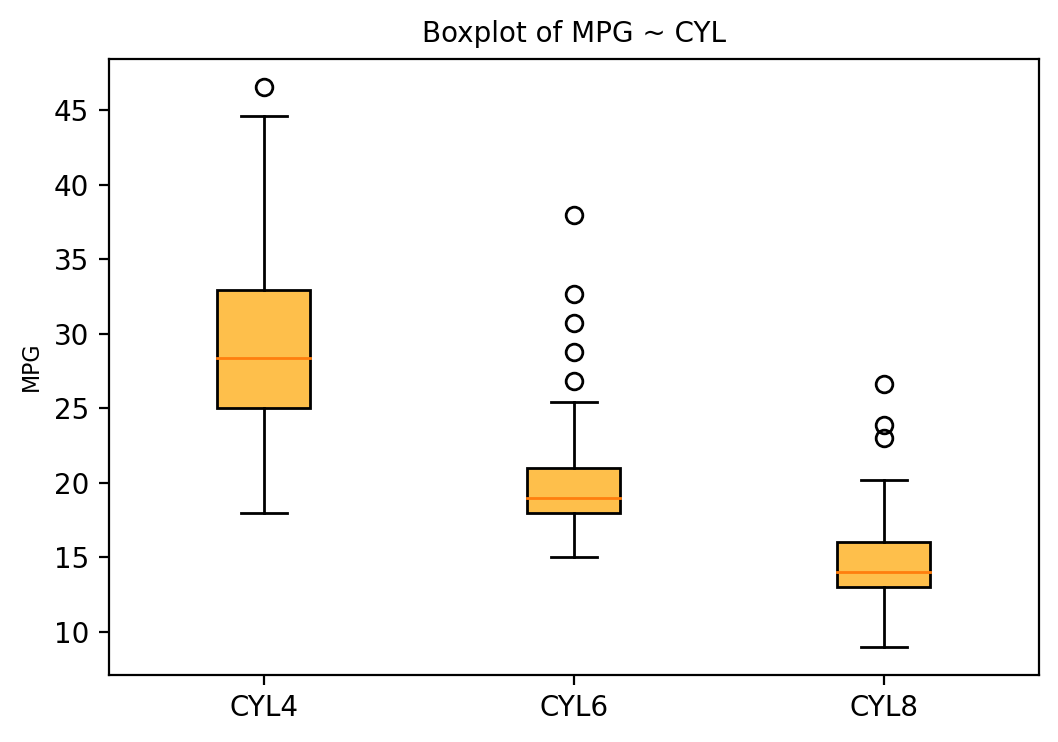

In [12]:
fig, ax = plt.subplots(figsize = (6, 4))

bplot1 = ax.boxplot([cyl4, cyl6, cyl8], patch_artist = True)
ax.set_ylabel('MPG', fontsize = 8)
ax.set_title('Boxplot of MPG ~ CYL', fontsize = 10)
plt.xticks([1, 2, 3], ['CYL4','CYL6','CYL8'])

# fill with colors
colors = ['#FEBF4B', '#FEBF4B', '#FEBF4B']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

The boxplot gives us more interesting insights about the CYL variable, we now know what the ranges, median and quartiles are for each CYL category.

As you can see, we started with a dataset which we did not know much about. By performing a simple EDA on this dataset, we end up knowing more about the dataset such as the intuition from the data. This gives us confidence to use the data in an application such as linear regression on regressing MPG as a response variable and the variables CYL, ENG and WGT as the predictors.